In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

import h3

#### Adding hexagons

In [47]:
df = pd.read_csv('C:/Users/D.Elistratov/Documents/AD3.0/Финальные кейсы/Кейс 3. Доставка/geodata.csv', sep=';')

In [48]:
df["hex_id"] = df.apply(lambda row: h3.geo_to_h3(row["latitude"], row["longitude"], resolution=8), axis = 1)

In [49]:
df['delivery_time'] = pd.to_datetime(df['delivery_time'], format="%d.%m.%y %H:%M")
df['order_time'] = pd.to_datetime(df['order_time'], format="%d.%m.%y %H:%M")

df['order_date'] = df['order_time'].dt.day

#### Day by day dynamics

In [50]:
dfd = df.groupby('order_date').count()[['id_order','delivery_time']].reset_index().sort_values('order_date', ascending=False)
dfd['conv'] = dfd['delivery_time'] / dfd['id_order']

In [51]:
dfd.head(5)

,order_date,id_order,delivery_time,conv
29,30,109,73,0.669725
28,29,121,90,0.743802
27,28,107,79,0.738318
26,27,124,89,0.717742
25,26,107,73,0.682243


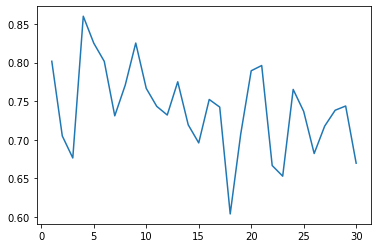

In [52]:
plt.plot(dfd['order_date'],dfd['conv'])

#### Grouping by hexagons

In [53]:
dfg = df.groupby('hex_id').count()[['id_order','delivery_time']].reset_index().sort_values('id_order', ascending=False)

In [54]:
dfg['conv'] = dfg['delivery_time'] / dfg['id_order']

#### Weak hexagons

In [55]:
dfg[dfg['id_order']>20].sort_values('id_order', ascending = False).head(10)

,hex_id,id_order,delivery_time,conv
0,0,298,254,0.852349
107,8811aa7abbfffff,116,42,0.362069
83,8811aa7a85fffff,113,78,0.690265
82,8811aa7a83fffff,82,33,0.402439
81,8811aa7a81fffff,81,57,0.703704
84,8811aa7a87fffff,74,31,0.418919
99,8811aa7aa9fffff,72,62,0.861111
90,8811aa7a95fffff,72,53,0.736111
29,8811aa781bfffff,71,52,0.732394
54,8811aa78c9fffff,70,22,0.314286


In [56]:
######  8811aa7abbfffff
######  8811aa7a83fffff
######  8811aa7a87fffff
######  8811aa78c9fffff

hexs = ['8811aa7abbfffff','8811aa7a83fffff', '8811aa7a87fffff', '8811aa78c9fffff']

len(df[(df['hex_id'].isin(hexs)) & (df['order_time']>='2022-06-15')])

#### 8811aa7abbfffff - Сухаревская - Тургеневская
#### Чеховская
#### Охотный ряд
#### Новокузнецкая

172

In [58]:
#df[(df['hex_id'].isin(hexs)) & (df['order_time']>='2022-06-15')]['id_order'].to_csv('C:/Users/D.Elistratov/Documents/AD3.0/Финальные кейсы/Кейс 3. Доставка/geodata2.csv', sep=';')

In [60]:
for i in hexs:
    print(i)
    df_loc = df[df['hex_id']==i].groupby('order_date').count()[['order_time','delivery_time']].reset_index()
    df_loc['conv'] = df_loc['delivery_time'] / df_loc['order_time']
    print(df_loc)

8811aa7abbfffff
    order_date  order_time  delivery_time      conv
0            1           2              2  1.000000
1            2           5              4  0.800000
2            3           3              3  1.000000
3            4           4              1  0.250000
4            5           4              4  1.000000
5            6           3              2  0.666667
6            7           4              3  0.750000
7            8           4              3  0.750000
8            9           5              4  0.800000
9           10           4              2  0.500000
10          11           4              2  0.500000
11          12           4              3  0.750000
12          13           8              4  0.500000
13          14           7              5  0.714286
14          15           3              0  0.000000
15          16           2              0  0.000000
16          17           7              0  0.000000
17          18           5              0  0.000

#### Day by day dynamics with / without weak hexagons

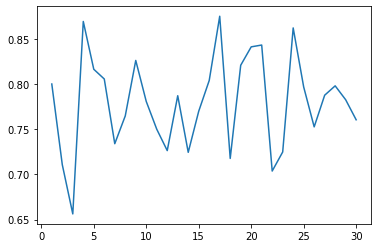

In [61]:
df_good = df[~df['hex_id'].isin(hexs)]

df_good_gr = df_good.groupby('order_date').count()[['id_order','delivery_time']].reset_index().sort_values('order_date', ascending=False)
df_good_gr['conv'] = df_good_gr['delivery_time'] / df_good_gr['id_order']

plt.plot(df_good_gr['order_date'],df_good_gr['conv'])

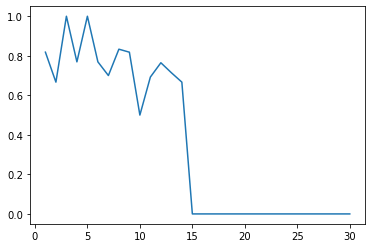

In [67]:
df_bad = df[df['hex_id'].isin(hexs)]

df_bad_gr = df_bad.groupby('order_date').count()[['id_order','delivery_time']].reset_index().sort_values('order_date', ascending=False)
df_bad_gr['conv'] = df_bad_gr['delivery_time'] / df_bad_gr['id_order']

plt.plot(df_bad_gr['order_date'],df_bad_gr['conv'])

In [ ]:
import geopy.distance

In [ ]:
#!pip install geopy

In [ ]:
df.head()